# FIFA 

# Web Analytics

June 30 2018

## Video Link: https://www.youtube.com/watch?v=JrJtt6NVBjo

#### Group 3 Members:

* Rafal Decowski 

* Tze Fung Lung  

* Yun Mai

* Ahsanul Choudhury

**Project Objectives:**

1.	Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2.	Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3.	What can you infer about each of the distinct groups?

**Data**

Kaggle FIFA World Cup

Weather: https://www.worldweatheronline.com  

**Objective**

Use network method to find out the most successful teams. 

Test if the stadiums conditions contributed to teams performance. 


In [1129]:
import nltk
import re
from nltk.sem import extract_rels,rtuple
import pandas as pd
import numpy as np
import sklearn
from bs4 import BeautifulSoup
from bs4 import Tag
import csv
import urllib3
import networkx as nx
from networkx.algorithms import bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data

In [1189]:
worldcup=pd.read_csv("https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/DATA620_project_2/WorldCups.csv",encoding='utf-8')
wcm=pd.read_csv("https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/DATA620_project_2/WorldCupMatches.csv",encoding = "ISO-8859-1")
players_dt=pd.read_csv("https://raw.githubusercontent.com/YunMai-SPS/DATA620_homework/master/DATA620_project_2/WorldCupPlayers.csv",encoding='utf-8')

In [1131]:
worldcup.head()

Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607

In [1190]:
wcm.head()

Year              Datetime  temp  humidity  wind.speed  precip.accum  \
0  1930  13 Jul 1930 - 15:00    NaN       NaN         NaN           NaN   
1  1930  13 Jul 1930 - 15:00    NaN       NaN         NaN           NaN   
2  1930  14 Jul 1930 - 12:45    NaN       NaN         NaN           NaN   
3  1930  14 Jul 1930 - 14:50    NaN       NaN         NaN           NaN   
4  1930  15 Jul 1930 - 16:00    NaN       NaN         NaN           NaN   

     Stage         Stadium         City Host Counrty  ...    \
0  Group 1         Pocitos  Montevideo            UY  ...     
1  Group 4  Parque Central  Montevideo            UY  ...     
2  Group 2  Parque Central  Montevideo            UY  ...     
3  Group 3         Pocitos  Montevideo            UY  ...     
4  Group 1  Parque Central  Montevideo            UY  ...     

  Half-time Away Goals                 Referee               Assistant 1  \
0                    0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1                    0       MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2                    0     TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3                    0   WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4                    0     REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   

                  Assistant 2 RoundID  MatchID  Home Team Initials  \
0         REGO Gilberto (BRA)     201     1096                 FRA   
1       WARNKEN Alberto (CHI)     201     1090                 USA   
2         BALWAY Thomas (FRA)     201     1093                 YUG   
3    MATEUCCI Francisco (URU)     201     1098                 ROU   
4  RADULESCU Constantin (ROU)     201     1085                 ARG   

   Away Team Initials Homewin goldif  
0                 MEX       1      3  
1                 BEL       1      3  
2                 BRA       1      1  
3                 PER       1      2  
4                 FRA       1      1  

[5 rows x 27 columns]

In [1133]:
players_dt.head()

RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN

In [1191]:
match_2014 = wcm[wcm.Year==2014]

In [1137]:
countries_2014 = (match_2014['Home Team Initials'].append(match_2014['Away Team Initials'])).unique()

In [1138]:
players_dt_2014 = players_dt[players_dt['MatchID'].isin (match_2014['MatchID'])]
players_2014 = players_dt_2014['Player Name'].unique()


# Graph testing

#### Stadiums

In [1193]:
B = nx.Graph()
B.add_nodes_from(wcm[wcm.Year == 2014.0]['Home Team Initials'], bipartite =0)
B.add_nodes_from(wcm[wcm.Year == 2014.0]['Stadium'], bipartite=1)
B.add_edges_from(list(zip(wcm[wcm.Year == 2014.0]['Home Team Initials'], wcm[wcm.Year == 2014.0]['Stadium'])))

#### Clustering

In [1296]:
c = bipartite.clustering(B)
c = bipartite.clustering(B,mode='min')

#### Bipartite test

In [1195]:
print(bipartite.is_bipartite(B))

True


## Colors

In [1196]:
colors = ['#3366ff' for i in range(len(top_nodes))] + ['#40bf80' for i in range(len(bottom_nodes))]

# Size

In [1197]:
edge_size = list(wcm[wcm.Year == 2014.0].goldif)

## Network graph

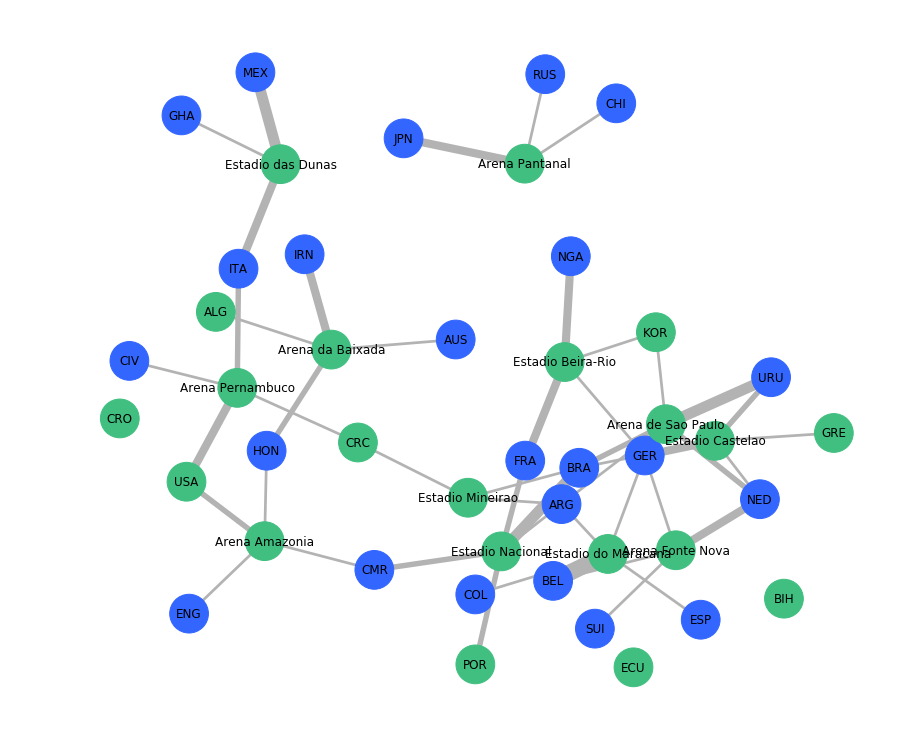

In [1198]:
plt.rcParams['figure.figsize'] = [12, 10]
degree_graph = nx.draw_kamada_kawai(B, 
                                    node_color=colors,
                                    edge_color='#b3b3b3',   
                                    node_size=1500, 
                                    with_labels=True, 
                                    width=np.multiply(edge_size, (np.e)))

## View all team and players

In [1139]:
countries = (matches['Home Team Initials'].append(matches['Away Team Initials'])).unique()
players = players_dt['Player Name'].unique()

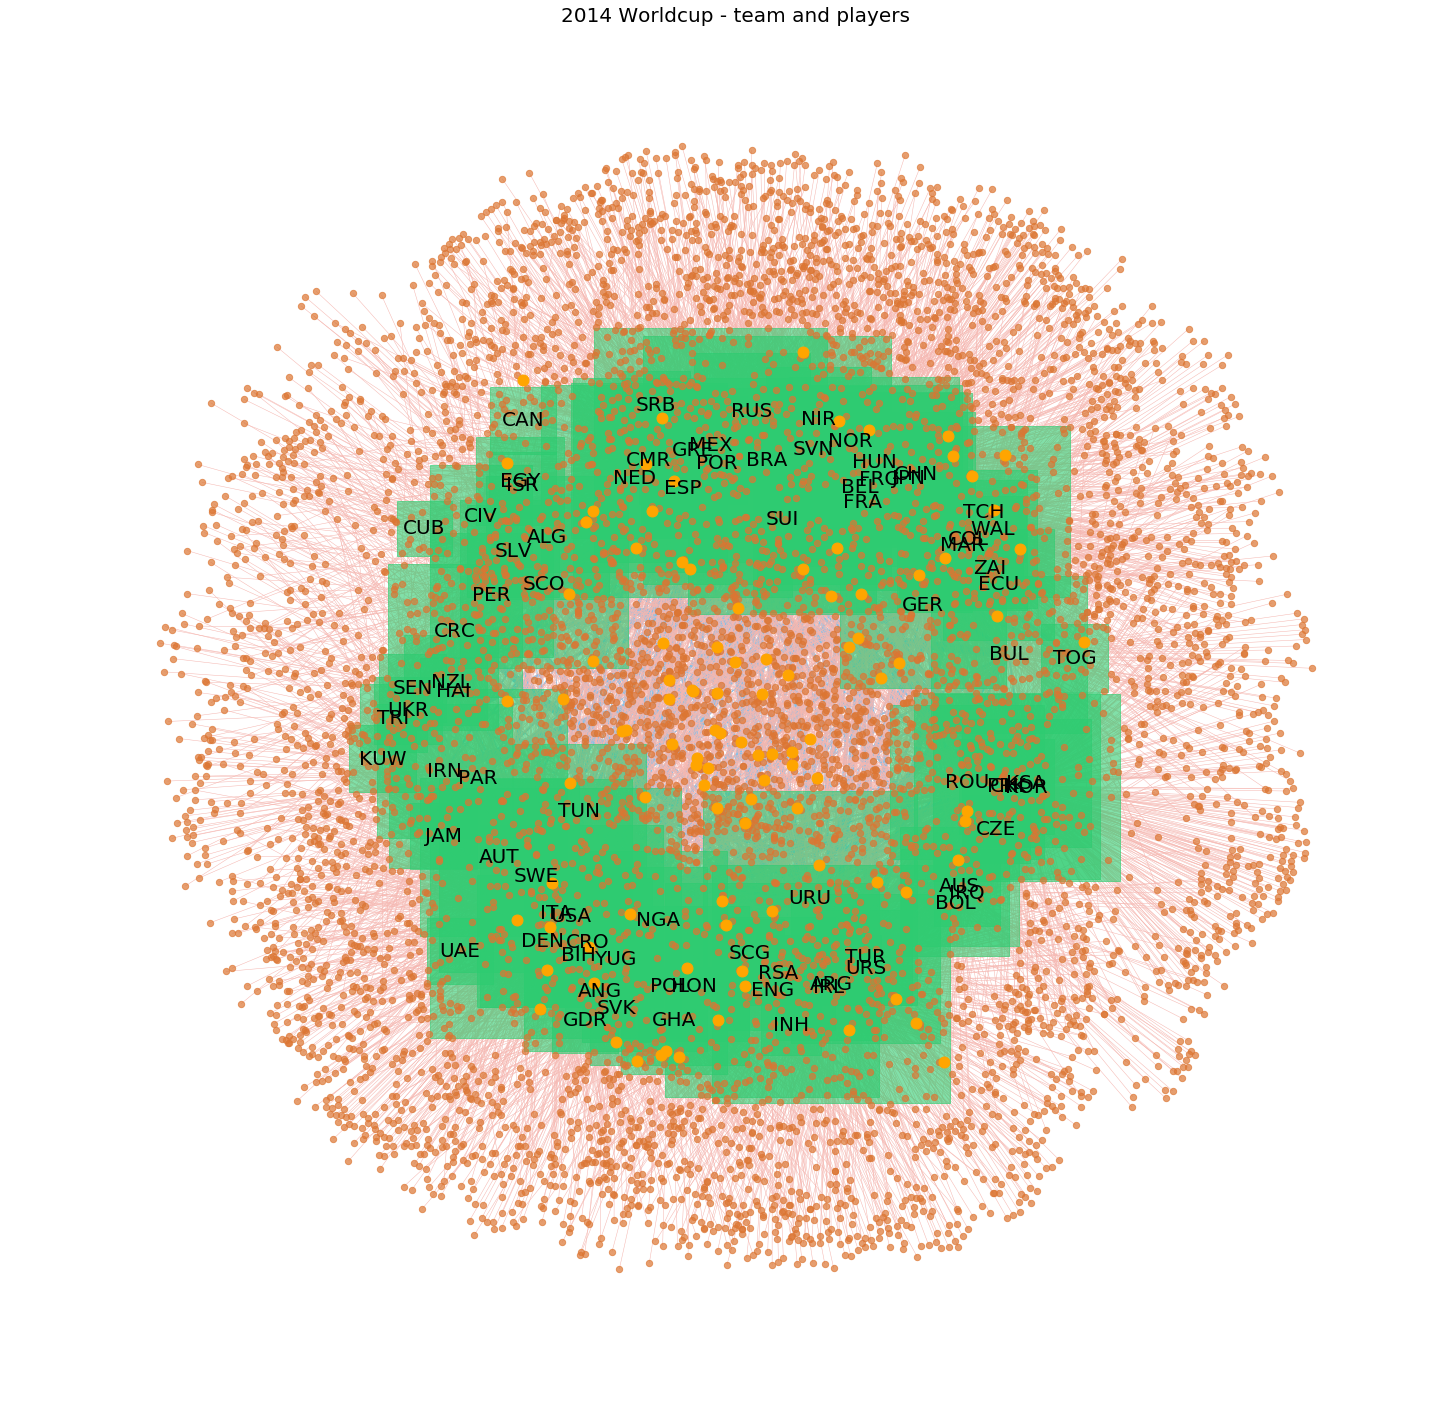

In [1140]:
plt.figure(figsize=(25, 25))

# Create the graph
g=nx.from_pandas_dataframe(players_dt,'Player Name','Team Initials')

# Create a layout for our nodes 
pos = nx.spring_layout(g,k=0.1)

# Go through every country's name and multiply that by 80 to get the circle size
country_size = [g.degree(country) * 200 for country in countries]

# Draw countries nodes
nx.draw_networkx_nodes(g, 
                       pos,
                       nodelist=list(countries),
                       node_size=country_size, # a LIST of sizes, based on g.degree
                       node_color='#2ECC71', ##FA8072 #58D68D
                       alpha=0.6, 
                       node_shape='s')
# Draw players nodes
nx.draw_networkx_nodes(g, pos, nodelist=list(players), with_labels=False, node_color='#DC7633', alpha=0.7, node_size=40)  #5DADE2 #EDBB99

# Draw popular players
popular_player = [player for player in players if g.degree(player) > 1]
nx.draw_networkx_nodes(g, pos, nodelist=list(popular_player), with_labels=False, node_color='orange', alpha=1, node_size=120) #FF0000

# Only add labels to the countries
labels = {}    
for node in list(g.nodes()):
    if node in list(countries):
        #set the node name as the key and the label as its value 
        labels[node] = node
        
nx.draw_networkx_labels(g, pos, labels=labels,font_size=20) #option font_color='r'

# Add edges between countries
g.add_weighted_edges_from([tuple(d) for d in matches[['Home Team Initials','Away Team Initials','goldif']].values])
country_edges =list(matches[['Home Team Initials','Away Team Initials']].apply(tuple, axis=1))
selected_edges = [(u,v) for u,v in g.edges if (u,v) in country_edges]
weights = [g[u][v]['weight'] for u,v in selected_edges]
nx.draw_networkx_edges(g, pos, edgelist=country_edges,edge_color="#85C1E9",width=weights) #AAB7B8


# add edges between players and countries
selected_edges_2 = [(u,v) for u,v in g.edges if not (u,v) in country_edges]
nx.draw_networkx_edges(g, pos, edgelist=selected_edges_2,edge_color="#F5B7B1",width=0.5) #AAB7B8

# Plot options
plt.axis('off')
plt.title("2014 Worldcup - team and players",fontsize=20)
plt.show()

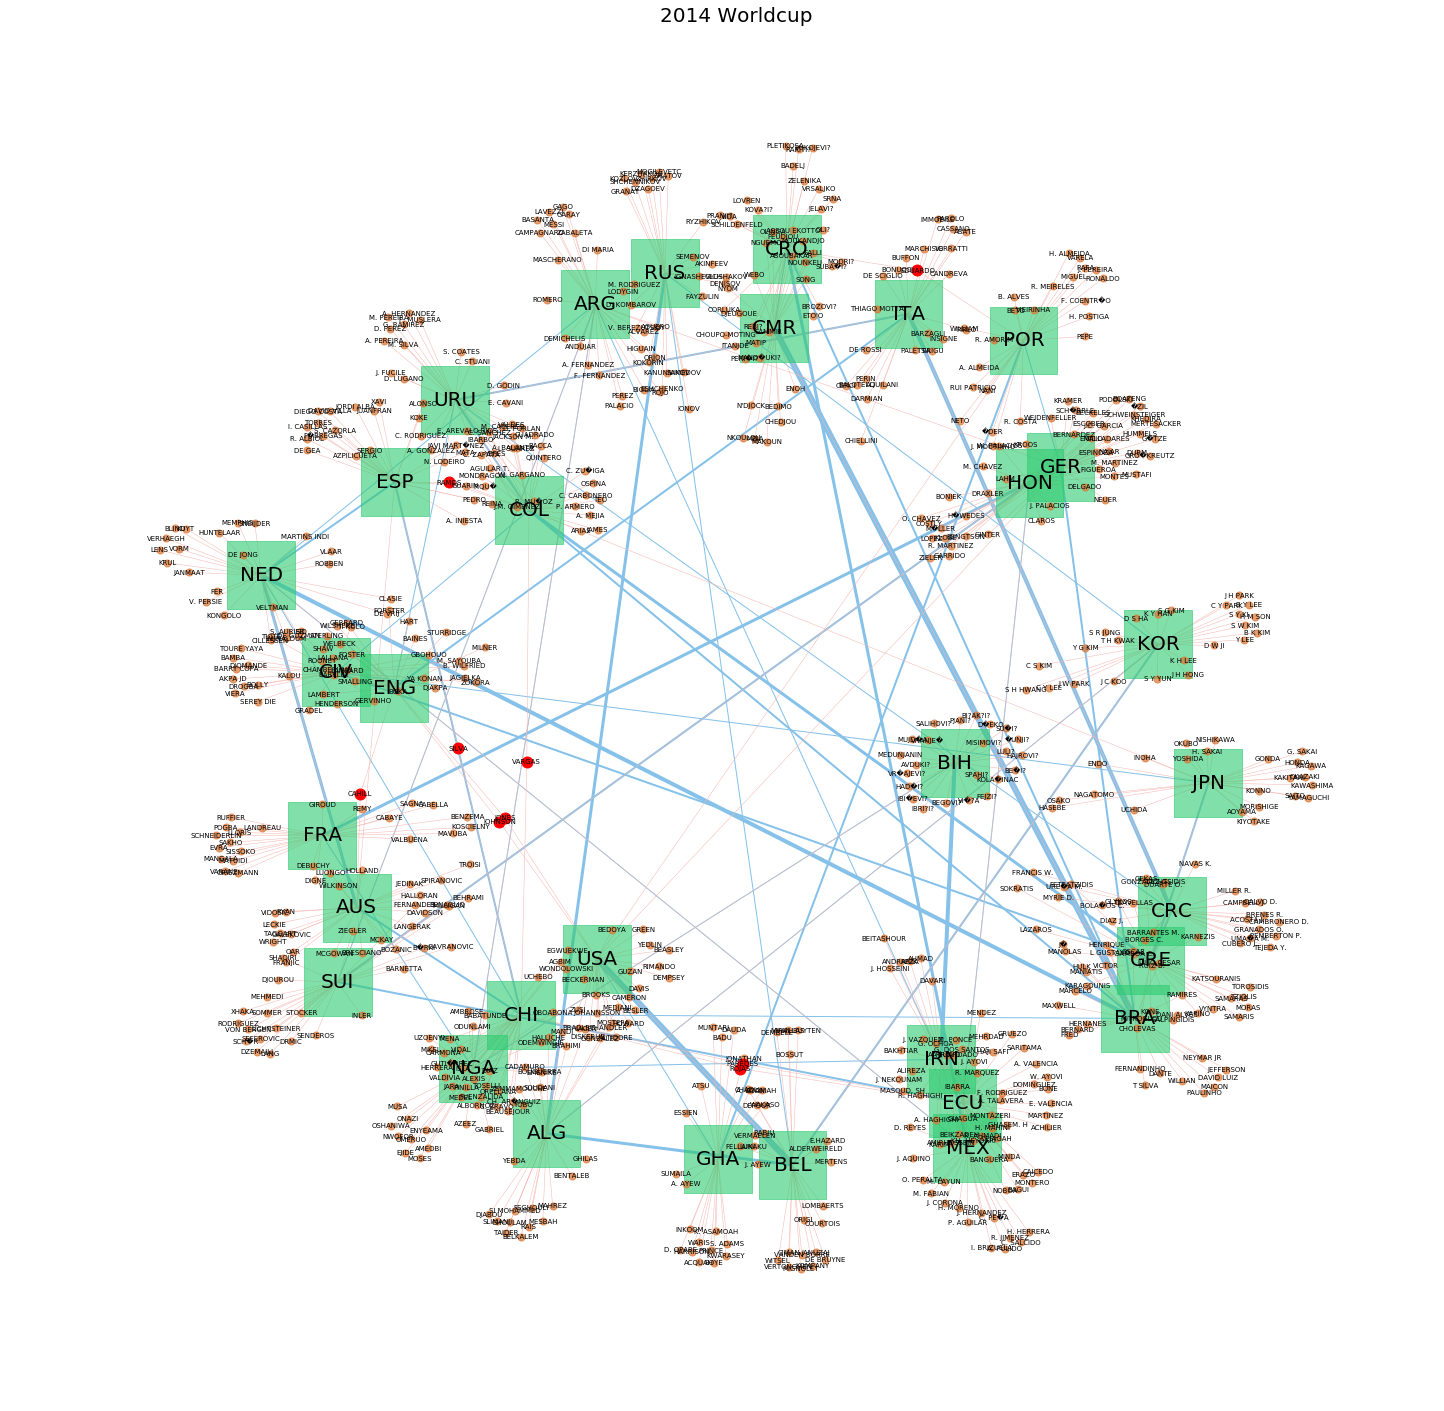

In [1141]:
plt.figure(figsize=(25, 25))

# Create the graph
g=nx.from_pandas_dataframe(players_dt_2014,'Player Name','Team Initials')

# Create a layout for our nodes 
pos = nx.spring_layout(g,k=0.1)

# Go through every country's name and multiply that by 80 to get the circle size
country_size = [g.degree(country) * 200 for country in countries_2014]

# Draw countries nodes
nx.draw_networkx_nodes(g, 
                       pos,
                       nodelist=list(countries_2014),
                       node_size=country_size, # a LIST of sizes, based on g.degree
                       node_color='#2ECC71', ##FA8072 #58D68D
                       alpha=0.6, 
                       node_shape='s')
# Draw players nodes
nx.draw_networkx_nodes(g, pos, nodelist=list(players_2014), with_labels=False, node_color='#DC7633', alpha=0.7, node_size=50)  #5DADE2 #EDBB99

# Draw popular players
popular_player = [player for player in players_2014 if g.degree(player) > 1]
nx.draw_networkx_nodes(g, pos, nodelist=list(popular_player), with_labels=False, node_color='#FF0000', alpha=1, node_size=120) #FF0000

# Add labels to the countries
labels = {}    
for node in list(g.nodes()):
    if node in list(countries_2014):
        #set the node name as the key and the label as its value 
        labels[node] = node      
nx.draw_networkx_labels(g, pos, labels=labels,font_size=20) #option font_color='r'

# Add labels to the players
labels_p = {}    
for node in list(g.nodes()):
    if node in list(players_2014):
        #set the node name as the key and the label as its value 
        labels_p[node] = node
nx.draw_networkx_labels(g, pos, labels=labels_p,font_size=7) #option font_color='r'

# Add edges between countries
g.add_weighted_edges_from([tuple(d) for d in match_2014[['Home Team Initials','Away Team Initials','goldif']].values])
country_edges =list(match_2014[['Home Team Initials','Away Team Initials']].apply(tuple, axis=1))
selected_edges = [(u,v) for u,v in g.edges if (u,v) in country_edges]
edges = g.edges()
weights = [g[u][v]['weight'] for u,v in selected_edges]
nx.draw_networkx_edges(g, pos, edgelist=country_edges,edge_color="#85C1E9",width=weights) #AAB7B8


# add edges between players and countries
selected_edges_2 = [(u,v) for u,v in g.edges if not (u,v) in country_edges]
nx.draw_networkx_edges(g, pos, edgelist=selected_edges_2,edge_color="#F5B7B1",width=0.5) #AAB7B8

# Plot options
plt.axis('off')
plt.title("2014 Worldcup",fontsize=20)
plt.show()

## Who won the most?

In [1146]:
winner = list(worldcup.Winner)
RunnersUp = list(worldcup['Runners-Up'])
third = list(worldcup.Third)
fourth = list(worldcup.Fourth)

In [1147]:
awards=[]
awards.extend(winner+RunnersUp+third+fourth)

top=[]
top.extend([1]*20+[2]*20+[3]*20+[4]*20)

In [1149]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite" 
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(list(set(awards)), bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from(list(zip(top,awards)))

In [1150]:
bottom_nodes, top_nodes = bipartite.sets(B)

nd_color = ['#40bf80' for i in range(len(bottom_nodes))] +['#3366ff' for i in range(len(top_nodes))]
nd_shape = ['s' for i in range(len(bottom_nodes))] +['o' for i in range(len(top_nodes))] 
edge_size = bipartite.degrees(B,bottom_nodes)[0]

In [1151]:
winner_fre = worldcup.Winner.value_counts().reset_index() 
RunnersUp_fre = worldcup['Runners-Up'].value_counts().reset_index() 
third_fre = worldcup.Third.value_counts().reset_index() 
fourth_fre = worldcup.Fourth.value_counts().reset_index() 

In [1152]:
weights=[]
for u,v in B.edges():
    if u ==1:
        for cty in winner_fre['index']:
            if v==cty:
                weights += list(winner_fre.loc[winner_fre['index']==cty, 'Winner'])
for u,v in B.edges():
    if u ==2:
        for cty in RunnersUp_fre['index']:
            if v==cty:
                weights += list(RunnersUp_fre.loc[RunnersUp_fre['index']==cty, 'Runners-Up'])
for u,v in B.edges():
    if u ==3:
        for cty in third_fre['index']:
            if v==cty:
                weights += list(third_fre.loc[third_fre['index']==cty, 'Third'])
for u,v in B.edges():
    if u ==4:
        for cty in fourth_fre['index']:
            if v==cty:
                weights += list(fourth_fre.loc[fourth_fre['index']==cty, 'Fourth'])

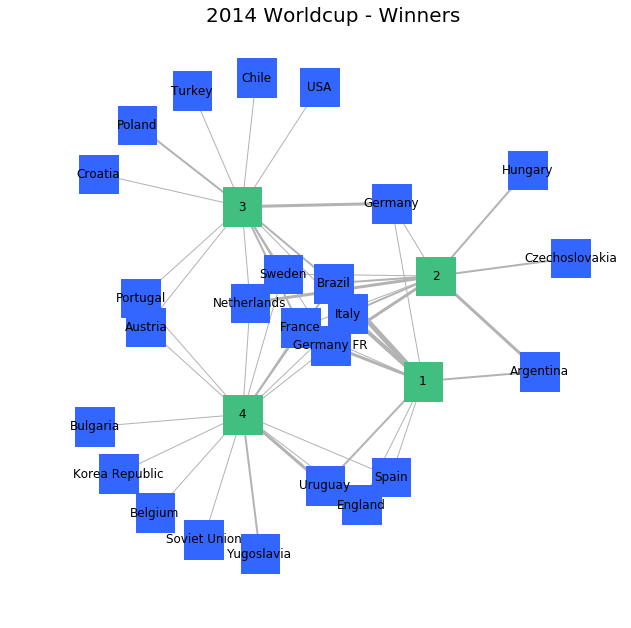

In [1153]:
plt.figure(figsize=(8, 8))

plt.rcParams['figure.figsize'] = [12, 10]
degree_graph = nx.draw_kamada_kawai(B, 
                                    node_color=nd_color,
                                    edge_color='#b3b3b3',   
                                    node_size=1500,
                                    node_shape='s',
                                    with_labels=True, 
                                    width=weights)
# Plot options
plt.axis('off')
plt.title("2014 Worldcup - Winners",fontsize=20)
plt.show()


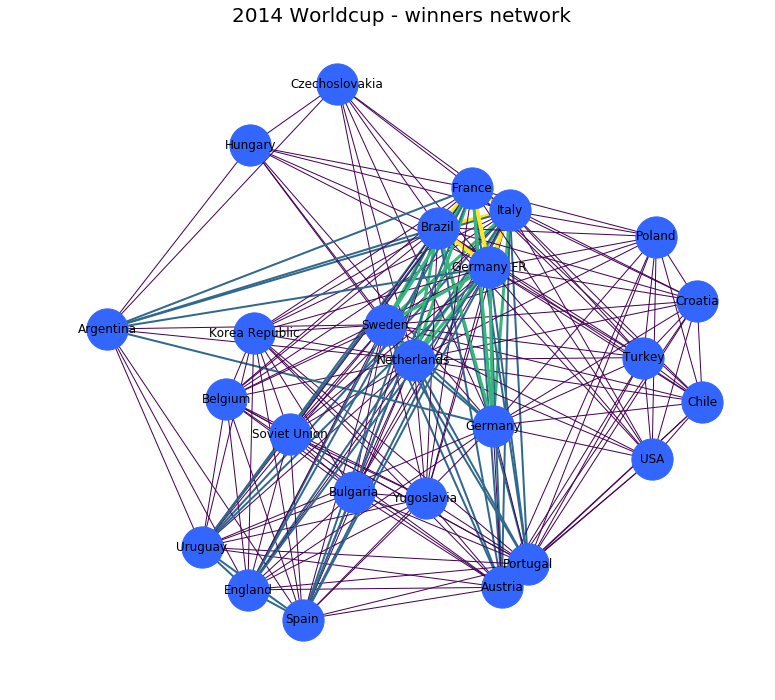

In [1154]:
team_win = bipartite.generic_weighted_projected_graph(B, top_nodes)
#team_win = nx.connected_component_subgraphs(team_win)[0]

weights=[]
for u,v in team_win.edges:
    weights.append(team_win.edges[(u,v)]['weight'])

plt.rcParams['figure.figsize'] = [10, 9]
one_mode_graph = nx.draw_kamada_kawai(team_win, 
                                       node_color="#3366ff",
                                       edge_color=weights,   
                                       node_size=1700,
                                       node_shape='o',
                                       with_labels=True, 
                                       width=weights)

plt.axis('off')
plt.title("2014 Worldcup - winners network ",fontsize=20)
plt.show()

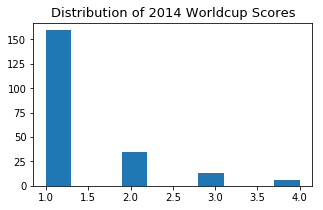

In [1155]:
plt.figure(figsize=(5, 3))

plt.hist(weights)

plt.title("Distribution of 2014 Worldcup Scores",fontsize=13)
plt.show()


To determine where to place the “water level”, we plot a histogram of edge values. From the histogram, we can see there are 4 different weights: 1, 2, 3, and 4, which represnet the number of shared neighbors in this situation. Approximately 70% of edges are weighted 1, so we can safely remove them.


In [1156]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

In [1390]:
def island_method(g, iterations=1):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))

    #compute the size of the step, so we get a reasonable step in iterations
    step=1
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

# Separate the graph into subparts using the island method

In [1391]:
cc=sorted(nx.connected_component_subgraphs(team_win), key = len, reverse=True)[0]
islands=island_method(cc)
sorted(nx.connected_component_subgraphs(islands[0][1]), key = len, reverse=True)

for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0],len(i[1]),len(sorted(nx.connected_component_subgraphs(i[1]), key = len, reverse=True)))

1 13 1
2 7 1
3 4 1


By interating different cut-off from 1 to 3, we got three trimed graphs with number of nodes as 13, 7 and 4 respectively. None of the trimed graph has more than one subgraph.

### The team won more than twice

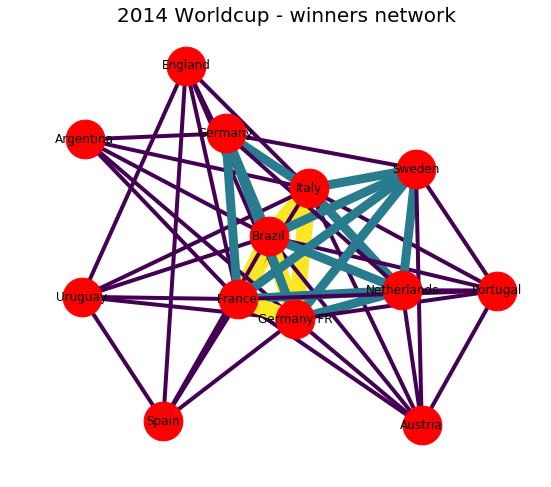

In [1158]:
winner_trim=trim_edges(team_win, weight=1)

## re-calculate weights based on the new graph
## assign exponentiation weight to edges for better view
weights=[edata['weight']**2 for u,v,edata in winner_trim.edges(data=True)]

plt.rcParams['figure.figsize'] = [9, 8]
nx.draw_networkx(winner_trim,width=weights, edge_color=weights, node_size=1500)

plt.axis('off')
plt.title("2014 Worldcup - winners network ",fontsize=20)
plt.show()

In [ ]:
### The team won more than three times

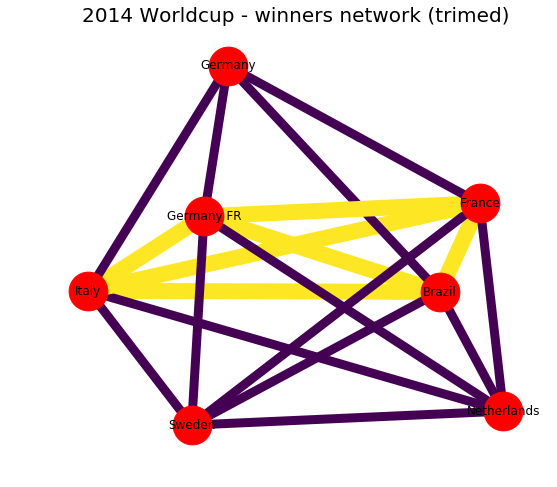

In [1159]:
winner_trim=trim_edges(team_win, weight=2)
## re-calculate weights based on the new graph
weights=[edata['weight']**2. for u,v,edata in winner_trim.edges(data=True)]

plt.rcParams['figure.figsize'] = [9, 8]
nx.draw_networkx(winner_trim,width=weights, edge_color=weights, node_size=1500)

plt.axis('off')
plt.title("2014 Worldcup - winners network (trimed)",fontsize=20)
plt.show()

### Conclusion:

#### Brazil, France, Italy, and Germany FR are the teams won most in the World Cup Soccer history.

## The relationship between the temperature and the score.

### Creat the network graph of temperature and teams with goals as the weight of edges.

In [1160]:
a = wcm[wcm.Year == 2014.0] [['goldif','temp']]
a['duplicated'] = wcm[wcm.Year == 2014.0] [['goldif','temp']].duplicated(keep=False)
a.groupby(a.columns.tolist()).apply(lambda x: tuple(x.index)).tolist()

[(794, 819),
 (798, 830),
 (829,),
 (779, 797, 809, 825),
 (804,),
 (777, 833),
 (813,),
 (807,),
 (810,),
 (776,),
 (828,),
 (796, 811),
 (808,),
 (832,),
 (775, 783, 792, 821),
 (782, 790),
 (803,),
 (773, 795, 827, 835),
 (772, 789, 802),
 (805, 818, 822, 826),
 (774, 799),
 (788,),
 (785,),
 (781, 831),
 (787, 800),
 (823,),
 (815, 817),
 (834,),
 (812,),
 (814,),
 (820,),
 (786,),
 (816,),
 (780, 791),
 (806, 824),
 (801,),
 (784,),
 (793,),
 (778,)]

### Average the weights(temperature) of duplicate edges

In [1161]:
tmpt_2014 = wcm[wcm.Year == 2014.0]

tmpt_2014['goldif'].loc[[794]] = tmpt_2014['goldif'].loc[[794, 819]].mean(axis=0)
tmpt_2014['goldif'].loc[[798]] = tmpt_2014['goldif'].loc[[798, 830]].mean(axis=0) 
tmpt_2014['goldif'].loc[[779]] = tmpt_2014['goldif'].loc[[779, 797, 809, 825]].mean(axis=0) 
tmpt_2014['goldif'].loc[[777]] = tmpt_2014['goldif'].loc[[777, 833]].mean(axis=0)
tmpt_2014['goldif'].loc[[796]] = tmpt_2014['goldif'].loc[[796, 811]].mean(axis=0) 
tmpt_2014['goldif'].loc[[775]] = tmpt_2014['goldif'].loc[[775, 783, 792, 821]].mean(axis=0)
tmpt_2014['goldif'].loc[[782]] = tmpt_2014['goldif'].loc[[782, 790]].mean(axis=0) 
tmpt_2014['goldif'].loc[[773]] = tmpt_2014['goldif'].loc[[773, 795, 827, 835]].mean(axis=0) 
tmpt_2014['goldif'].loc[[772]] = tmpt_2014['goldif'].loc[[772, 789, 802]].mean(axis=0)
tmpt_2014['goldif'].loc[[805]] = tmpt_2014['goldif'].loc[[805, 818, 822, 826]].mean(axis=0) 
tmpt_2014['goldif'].loc[[774]] = tmpt_2014['goldif'].loc[[774, 799]].mean(axis=0)
tmpt_2014['goldif'].loc[[781]] = tmpt_2014['goldif'].loc[[781, 831]].mean(axis=0) 
tmpt_2014['goldif'].loc[[787]] = tmpt_2014['goldif'].loc[[787, 800]].mean(axis=0) 
tmpt_2014['goldif'].loc[[815]] = tmpt_2014['goldif'].loc[[815, 817]].mean(axis=0)
tmpt_2014['goldif'].loc[[780]] = tmpt_2014['goldif'].loc[[780, 791]].mean(axis=0) 
tmpt_2014['goldif'].loc[[806]] = tmpt_2014['goldif'].loc[[806, 824]].mean(axis=0)

t = tmpt_2014.loc[[819,830,797, 809, 825, 833,811,783, 792, 821,
                                790,795, 827, 835,789, 802,818, 822, 826,
                               799,831,800, 817,791,824]]

tmpt_2014 = tmpt_2014.drop(t.index, axis=0)



### Node size and edge size

In [1370]:
B = nx.from_pandas_dataframe(tmpt_2014, 'goldif', 'temp', edge_attr=['goldif'])
sorted(nx.connected_component_subgraphs(B), key = len, reverse=True)

In [1371]:
len(tmpt_2014) == B.number_of_edges()

True

In [1164]:
B.edges()

EdgeView([(1.0, 81.0), (1.0, 79.0), (1.0, 86.0), (1.0, 73.0), (1.0, 61.0), (1.0, 75.0), (1.0, 88.0), (1.0, 70.0), (1.0, 77.0), (1.0, 82.0), (1.0, 55.0), (1.0, 71.0), (1.0, 59.0), (1.0, 68.0), (1.0, 72.0), (81.0, 3.0), (81.0, 2.0), (79.0, 0.0), (79.0, 3.0), (79.0, 4.0), (79.0, 2.0), (86.0, 2.0), (73.0, 2.0), (73.0, 3.0), (0.0, 75.0), (0.0, 68.0), (0.0, 70.0), (0.0, 77.0), (0.0, 84.0), (0.0, 71.0), (6.0, 68.0), (68.0, 2.0), (68.0, 3.0), (75.0, 2.0), (75.0, 4.0), (3.0, 69.0), (3.0, 66.0), (2.0, 77.0), (4.0, 84.0)])

In [1372]:
bottom_nodes, top_nodes = bipartite.sets(B)

nd_color = []
for nd in B.nodes():
    if nd < 7.0:
        nd_color.append('#40bf80')
    else:
        nd_color.append('#3366ff')

nd_size = []
for nd in B.nodes():
    if nd < 7.0:
        nd_size.append((nd+1)*20)
    else:
        nd_size.append(nd)

nd_size = [(x+0.2)*30 for x in nd_size]

### Draw the network

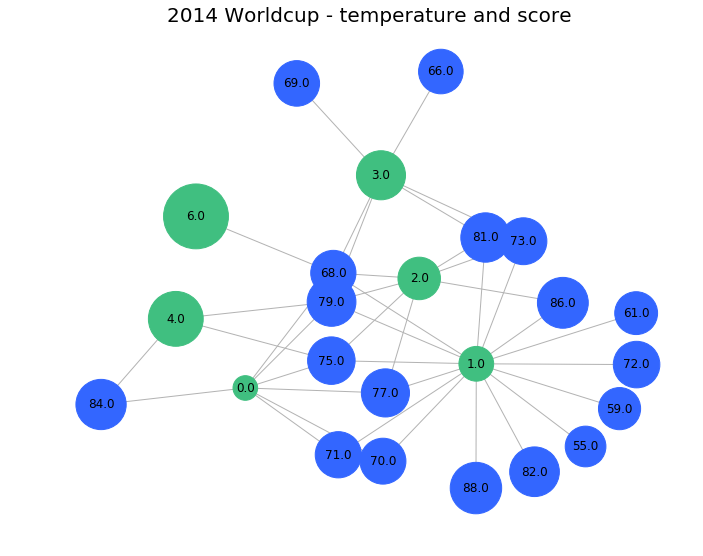

In [1373]:
plt.rcParams['figure.figsize'] = [9, 7]
temperature_graph = nx.draw_kamada_kawai(B, 
                                    node_color=nd_color,
                                    edge_color='#b3b3b3',   
                                    node_size=nd_size,
                                    node_shape='o',
                                    with_labels=True, 
                                    width = 1)
plt.axis('off')
plt.title("2014 Worldcup - temperature and score",fontsize=20)
plt.show()

### Draw the network of temparature

In [1395]:
def my_weight(G, u, v, weight='goldif'):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w
G_tmpt = bipartite.generic_weighted_projected_graph(B, top_nodes, weight_function=my_weight)

In [1396]:
weights=[]
for u,v in G_tmpt.edges:
    weights.append(G_tmpt.edges[(u,v)]['weight'])
set(weights)

{0.0, 2.0, 6.0, 8.0, 12.0, 14.0}

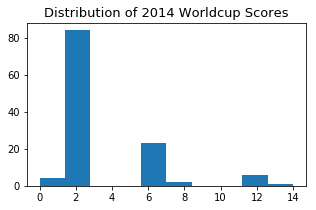

In [1397]:
plt.figure(figsize=(5, 3))

plt.hist(weights)

plt.title("Distribution of 2014 Worldcup Scores",fontsize=13)
plt.show()

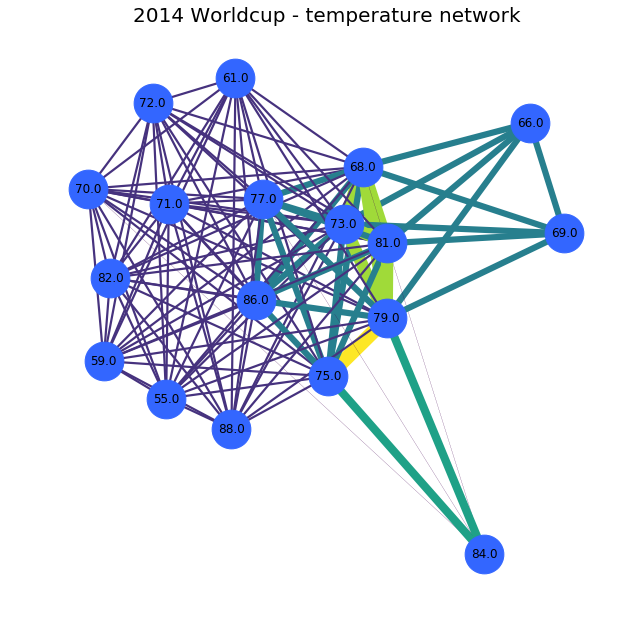

In [1398]:
weights = [x+0.2 for x in weights]
plt.rcParams['figure.figsize'] = [8, 8]
one_mode_graph = nx.draw(G_tmpt,
                     node_color="#3366ff",
                     edge_color=weights,   
                     node_size=1500,
                     node_shape='o',
                     with_labels=True, 
                     width=weights)
plt.axis('off')
plt.title("2014 Worldcup - temperature network",fontsize=20)
plt.show()

### Separate the graph into subparts using the island method

In [1386]:
def island_method(g, iterations=1):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))

    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [1388]:
cc=sorted(nx.connected_component_subgraphs(G_tmpt), key = len, reverse=True)[0]
islands=island_method(cc,iterations=3)
sorted(nx.connected_component_subgraphs(islands[0][1]), key = len, reverse=True)

for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0],len(i[1]),len(sorted(nx.connected_component_subgraphs(i[1]), key = len, reverse=True)))

0 18 1
4 10 1
8 5 1
12 2 1


By interating different cut-off from 0 to 12 with step as 4, we got four trimed graphs with number of nodes as 18, 10, 5, and 2 respectively. None of the trimed graph has more than one subgraph.

### Trim the network

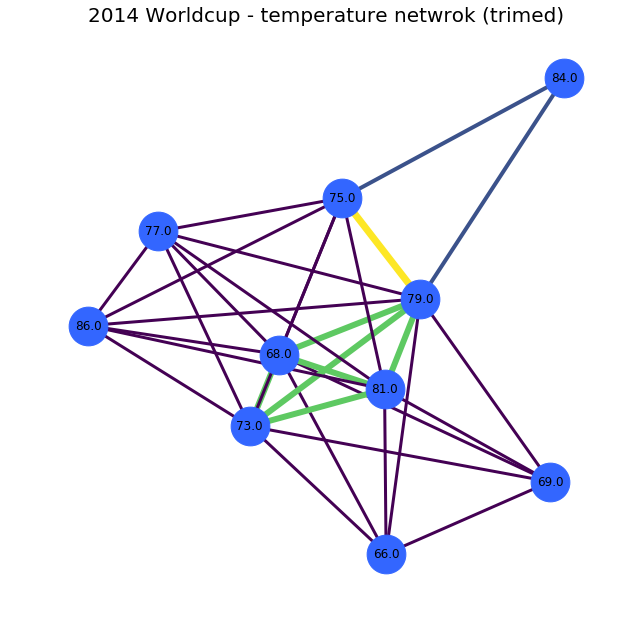

In [1399]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

tmpt_trim=trim_edges(G_tmpt, weight=2)

## re-calculate weights based on the new graph
## assign exponentiation weight to edges for better view
weights=[edata['weight']/2 for u,v,edata in tmpt_trim.edges(data=True)]

plt.rcParams['figure.figsize'] = [8, 8]
one_mode_graph = nx.draw(tmpt_trim,
                     node_color="#3366ff",
                     edge_color=weights,   
                     node_size=1500,
                     node_shape='o',
                     with_labels=True, 
                     width=weights)
plt.axis('off')
plt.title("2014 Worldcup - temperature netwrok (trimed)",fontsize=20)
plt.show()

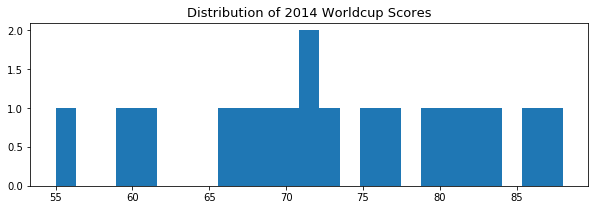

In [1172]:
plt.figure(figsize=(10, 3))
bottom_nodes, top_nodes = bipartite.sets(B)
plt.hist(list(top_nodes),bins=25)

plt.title("Distribution of 2014 Worldcup Scores",fontsize=13)
plt.show()

### Conclusion:

#### When temperature is between 73 F and 81 F, teams tend to score more goals in the match. Lower than 73 F or higher than 81 F, team will score less goals.

## The relationship between the humidity and the score.


### Creat the network graph of humidity and teams with goals as the weight of edges.

In [1297]:
a = wcm[wcm.Year == 2014.0] [['goldif','humidity']]
a['duplicated'] = wcm[wcm.Year == 2014.0] [['goldif','humidity']].duplicated(keep=False)
a.groupby(a.columns.tolist()).apply(lambda x: tuple(x.index)).tolist()

[(797, 809),
 (825,),
 (779,),
 (830,),
 (819,),
 (813,),
 (794,),
 (777,),
 (829,),
 (798,),
 (804,),
 (833,),
 (775, 821),
 (832,),
 (827,),
 (802,),
 (788,),
 (790,),
 (776,),
 (772, 799),
 (782, 803),
 (796,),
 (805,),
 (818,),
 (826,),
 (795, 835),
 (808,),
 (773, 792),
 (811,),
 (822,),
 (789,),
 (807, 810),
 (774, 783),
 (828,),
 (787,),
 (834,),
 (815,),
 (812,),
 (823,),
 (800,),
 (785,),
 (781, 831),
 (817,),
 (780,),
 (816,),
 (806,),
 (820,),
 (824,),
 (786,),
 (814,),
 (791,),
 (793,),
 (784,),
 (801,),
 (778,)]

### Average the weights(humidity) of duplicate edges

In [1406]:
humi_2014 = wcm[wcm.Year == 2014.0]

humi_2014['goldif'].loc[[797]] = humi_2014['goldif'].loc[[797, 809]].mean(axis=0)
humi_2014['goldif'].loc[[775]] = humi_2014['goldif'].loc[[775, 821]].mean(axis=0) 
humi_2014['goldif'].loc[[772]] = humi_2014['goldif'].loc[[772, 799]].mean(axis=0) 
humi_2014['goldif'].loc[[782]] = humi_2014['goldif'].loc[[782, 803]].mean(axis=0)
humi_2014['goldif'].loc[[795]] = humi_2014['goldif'].loc[[795, 835]].mean(axis=0) 
humi_2014['goldif'].loc[[773]] = humi_2014['goldif'].loc[[773, 792]].mean(axis=0)
humi_2014['goldif'].loc[[807]] = humi_2014['goldif'].loc[[807, 810]].mean(axis=0) 
humi_2014['goldif'].loc[[774]] = humi_2014['goldif'].loc[[774, 783]].mean(axis=0) 
humi_2014['goldif'].loc[[781]] = humi_2014['goldif'].loc[[781, 831]].mean(axis=0)


t = humi_2014.loc[[809,821,799,803,835,792,810,783,831]]

humi_2014 = humi_2014.drop(t.index, axis=0)


In [1407]:
humi_2014['humidity'] = [x*100 for x in humi_2014['humidity']]

humi_2014['humidity'] = humi_2014['humidity'].map('{:,.0f}'.format)

In [1417]:
humi_2014['humidity'] = [int(x) for x in humi_2014['humidity']]
humi_2014['humidity'].dtypes

dtype('int64')

In [1426]:
B = nx.Graph()
B = nx.from_pandas_edgelist(humi_2014, 'goldif', 'humidity', edge_attr=['goldif'])

#B = nx.Graph()
#B.add_nodes_from(humi_2014['goldif'],  bipartite=0)
#B.add_nodes_from(humi_2014['humidity']*100, bipartite=1)
#B.add_edges_from(list(zip(humi_2014['goldif'], humi_2014['humidity']*100)))

sorted(nx.connected_component_subgraphs(B), key = len, reverse=True)

**There is one subgraphs.**

In [1419]:
bipartite.is_bipartite(B)

True

In [1328]:
len(humi_2014) == B.number_of_edges()

True

### Node size and edge size

In [1427]:
bottom_nodes, top_nodes = bipartite.sets(B)

nd_color = []
for nd in B.nodes():
    if nd < 7.0:
        nd_color.append('#40bf80')
    else:
        nd_color.append('#3366ff')

nd_size = []
for nd in B.nodes():
    if nd < 7.0:
        nd_size.append((nd+1)*20)
    else:
        nd_size.append(nd)

nd_size = [(x+0.2)*30 for x in nd_size]

### Draw the network

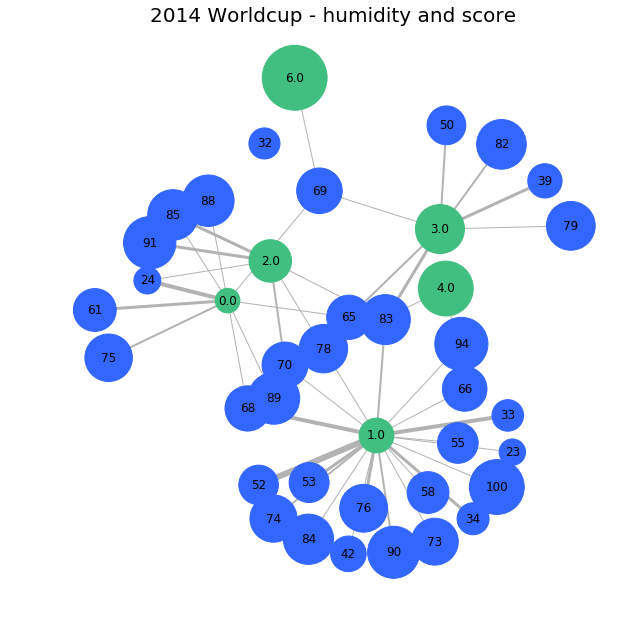

In [1428]:
plt.rcParams['figure.figsize'] = [9, 8]

plt.rcParams['figure.figsize'] = [8, 8]
humidity_graph = nx.draw_kamada_kawai(B, 
                                    node_color=nd_color,
                                    edge_color='#b3b3b3',   
                                    node_size=nd_size,
                                    node_shape='o',
                                    with_labels=True, 
                                    width = edge_size)

plt.title("2014 Worldcup - humidity and score",fontsize=20)
plt.show()

### Draw the network of humidity

In [1429]:
G_humi = bipartite.generic_weighted_projected_graph(B, top_nodes, weight_function=my_weight)

In [1434]:
weights=[]
for u,v in G_humi.edges:
    weights.append(G_humi.edges[(u,v)]['weight'])
set(weights)

{0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0}

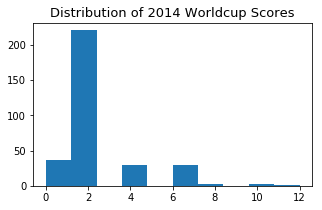

In [1435]:
plt.figure(figsize=(5, 3))

plt.hist(weights)

plt.title("Distribution of 2014 Worldcup Scores",fontsize=13)
plt.show()

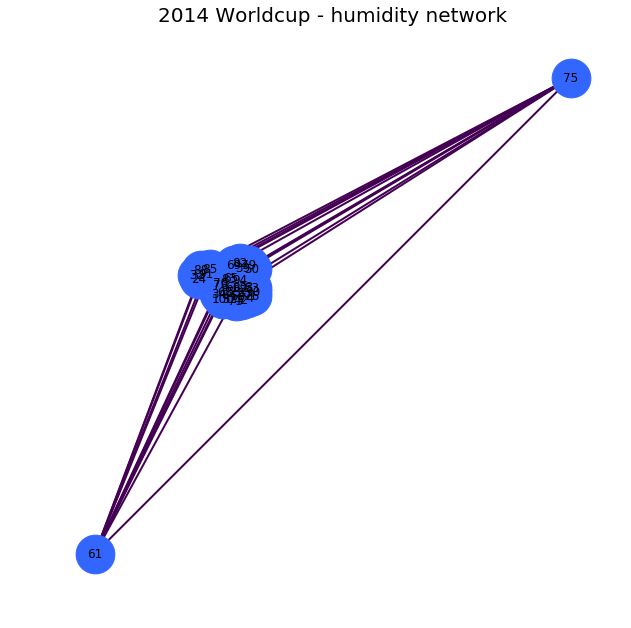

In [1445]:
weights = [x+0.2 for x in weights]

plt.rcParams['figure.figsize'] = [8, 8]
one_mode_graph = nx.draw(G_humi,
                     node_color="#3366ff",
                     edge_color=weights,   
                     node_size=1500,
                     node_shape='o',
                     with_labels=True, 
                     width=weights)
plt.axis('off')
plt.title("2014 Worldcup - humidity network",fontsize=20)
plt.show()

### Separate the graph into subparts using the island method

In [1446]:
def island_method(g, iterations=1):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))

    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [1447]:
cc=sorted(nx.connected_component_subgraphs(G_tmpt), key = len, reverse=True)[0]
islands=island_method(cc,iterations=3)
sorted(nx.connected_component_subgraphs(islands[0][1]), key = len, reverse=True)

for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0],len(i[1]),len(sorted(nx.connected_component_subgraphs(i[1]), key = len, reverse=True)))

0 18 1
4 10 1
8 5 1
12 2 1


By interating different cut-off from 0 to 12 with step as 4, we got four trimed graphs with number of nodes as 18, 10, 5, and 2 respectively. None of the trimed graph has more than one subgraph.

### Trim the network

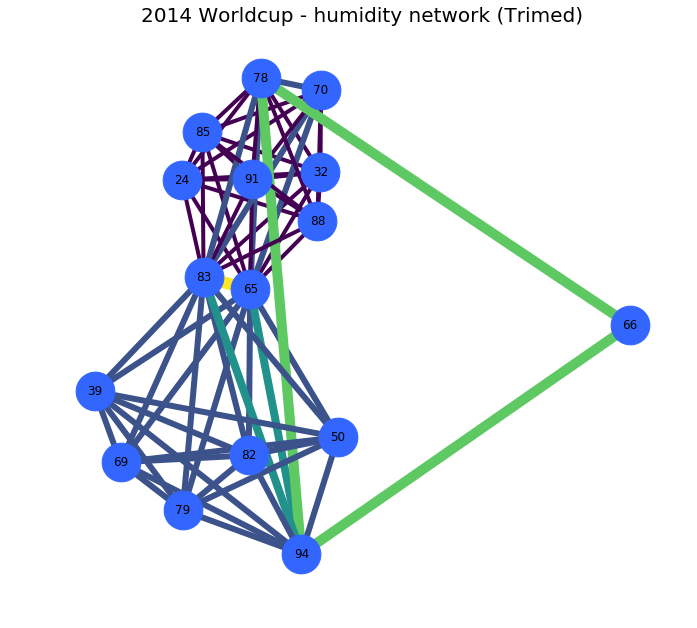

In [1452]:
humi_trim=trim_edges(G_humi, weight=3)

## re-calculate weights based on the new graph
## assign exponentiation weight to edges for better view
weights=[edata['weight'] for u,v,edata in humi_trim.edges(data=True)]

plt.rcParams['figure.figsize'] = [9, 8]
one_mode_graph = nx.draw_kamada_kawai(humi_trim,
                     node_color="#3366ff",
                     edge_color=weights,   
                     node_size=1500,
                     node_shape='o',
                     with_labels=True, 
                     width=weights)
plt.axis('off')
plt.title("2014 Worldcup - humidity network (Trimed)",fontsize=20)
plt.show()

### Coclusion:

#### There is no pattern showing teams did better under certain range of humidity values.